# Защита персональных данных клиентов страховой компании

Необходимо защитить данные клиентов страховой компании «Хоть потоп»: разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></div>

## Загрузка данных

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

Настроим вывод для вещественных чисел:

In [2]:
pd.options.display.float_format = '{:,.4f}'.format

In [3]:
try:
    PATH = 'datasets/'
    df = pd.read_csv(os.path.join(PATH, 'insurance.csv'))
    print('Прочитали файл путь:', PATH)
except:
    print('У нас проблема')

Прочитали файл путь: datasets/


In [4]:
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0000,"49,600.0000",1,0
1,0,46.0000,"38,000.0000",1,1
2,0,29.0000,"21,000.0000",0,0
3,0,21.0000,"41,700.0000",2,0
4,1,28.0000,"26,100.0000",0,0


Получим общую информацию о таблице:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Итак, в таблице 5 колонок, 5_000 строк. Тип данных в столбцах: object, float64. Пропущенных значений нет

Оценим столбцы с числовым типом данных: посмотрим на статистические данные, которые дают представление о распределении значений:

In [6]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,"5,000.0000","5,000.0000","5,000.0000","5,000.0000","5,000.0000"
mean,0.4990,30.9528,"39,916.3600",1.1942,0.1480
std,0.5000,8.4408,"9,900.0836",1.0914,0.4632
min,0.0000,18.0000,"5,300.0000",0.0000,0.0000
25%,0.0000,24.0000,"33,300.0000",0.0000,0.0000
50%,0.0000,30.0000,"40,200.0000",1.0000,0.0000
75%,1.0000,37.0000,"46,600.0000",2.0000,0.0000
max,1.0000,65.0000,"79,000.0000",6.0000,5.0000


Построим тепловую матрицу корреляций:

In [7]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.000000,0.002074,0.014910,-0.008991,0.010140
Возраст,0.002074,1.000000,-0.019093,-0.006692,0.651030
Зарплата,0.014910,-0.019093,1.000000,-0.030296,-0.014963
Члены семьи,-0.008991,-0.006692,-0.030296,1.000000,-0.036290
Страховые выплаты,0.010140,0.651030,-0.014963,-0.036290,1.000000


Матрица корреляций не выявила значительных зависимостей между обучающими признаками

Найдем и удалим дубликаты:

In [8]:
df.duplicated().sum()

153

In [9]:
df.drop_duplicates(inplace=True)

Посмотрим на количество уникальных значений в признаках:

In [10]:
df.nunique()

Пол                    2
Возраст               46
Зарплата             524
Члены семьи            7
Страховые выплаты      6
dtype: int64

In [11]:
def histplot_boxplot(df, column, bins=48):
    """
    df - датафрейм
    column - название колонки для построения распределения
    bins - количество корзин (48 по умолчанию)
    
    """
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.13, .87)}, figsize=(10, 4))
    sns.boxplot(data=df, 
                x=column,  
                orient='h',
                order=[1,0],
                palette='pastel',
                ax=ax_box)
    sns.histplot(data=df, 
                 x=column, 
                 bins=bins, 
                 kde=True, 
                 palette='pastel', 
                 hue_order=[1,0],
                 ax=ax_hist)
 
    ax_box.set(xlabel='')
    ax_box.set(title='Ящик с усами для "{}"'.format(column))
    ax_hist.set(title='Распределение признака "{}"'.format(column))
    plt.show()

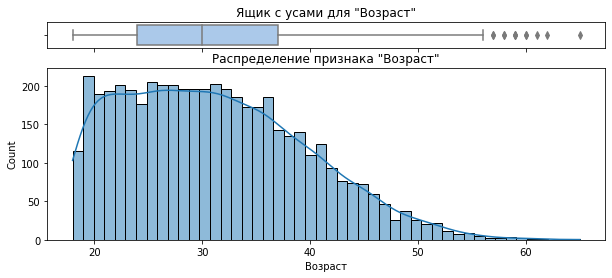

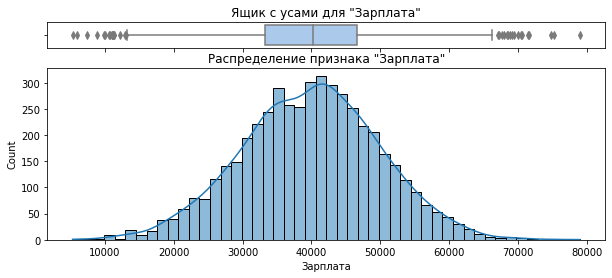

In [12]:
columns = ['Возраст', 'Зарплата']
for column in columns:
        histplot_boxplot(df, column)

**Вывод:**
    
- пропусков нет
- типы данных изменений не требуют
- дубликаты удалены

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Вопрос:** 

Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?

**Ответ:**

Не изменится


**Обоснование:** 

Обозначим новую матрицу признаков $Z$ как произведение матрицы признаков $X$ и обратимой матрицы $P$:

$$Z = X*P$$
тогда веса признаков $w_{2}$ будут равны:

$$w_2 = (Z^T Z)^{-1}Z^T y$$
$$w_2 = ((XP)^T XP)^{-1}(XP)^T y$$
$$w_2 = P^{T(-1)} P^{T} P^{-1} (X^T X)^{-1} X^T y$$

В правой стороне уравнения получилось выразить $w$ из формулы обучения:
$$w_2 = P^{T(-1)} P^{T} P^{-1} w$$

Произведение транспонированной матрицы $P$ на обратную ей будет равно единичной матрице $E$:

$$w_2 = E P^{-1} w = P^{-1} w$$

Полученное выражение устанавливает связь между двумя векторами весов. Подставим уравнение в формулу предсказаний:

$$a_2 = Zw_2 = XPw_2$$

$$a_2 = X P P^{-1} w$$

$$a_2 = X w = a$$

Следовательно, мы установили, что умножение матрицы признаков на обратимую матрицу не изменяет предсказания линейной регрессии.

## Алгоритм преобразования

**Алгоритм преобразования данных для решения задачи:**

Умножение матрицы признаков на случайную обратимую матрицу

**Обоснование:**

Согласно доказательству в предыдущем пункте, умножение матрицы признаков на какую-либо обратимую матрицу не приводит к изменению предсказаний, поэтому значения метрики `r2` не должны измениться

## Проверка алгоритма

Подготовим матрицу входных признаков $X$ и вектор целевого признака $y$:

In [13]:
X = df.drop(columns='Страховые выплаты').values
y = df['Страховые выплаты'].values
print(X.shape, y.shape)

(4847, 4) (4847,)


Создадим случайную квадратную матрицу $P$, и проверим ее на обратимость

In [14]:
P = np.random.normal(size=(4,4))

In [15]:
try:
    np.linalg.inv(P)
    print('Матрица обратима')
except np.linalg.LinAlgError:
    print('Матрица не обратима')

Матрица обратима


Умножим матрицу признаков $X$ на матрицу $P$. Результат запишем в $Z$

In [16]:
Z = X @ P
pd.DataFrame(data=Z, columns=df.drop(columns='Страховые выплаты').columns).head()

,Пол,Возраст,Зарплата,Члены семьи
0,"9,503.6390","-37,351.7046","-51,100.1478","-3,024.6011"
1,"7,289.4896","-28,633.1408","-39,143.4662","-2,306.8302"
2,"4,030.4061","-15,827.0919","-21,630.9586","-1,272.3774"
3,"7,982.3457","-31,389.9322","-42,966.0173","-2,551.4268"
4,"5,004.5363","-19,660.7581","-26,887.0447","-1,587.5416"


Разделим данные на обучающие и тестовые выборки, обучим модель, получим предсказания и значение метрики

In [17]:
def func(model, X, y):
    """
    model - модель машинного обучения
    X - входные признаки
    y - целевой признак
    
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)
    model.fit(X_train, y_train)
    r2 = r2_score(y_test, model.predict(X_test))
    print('r2 = {:.4f}'.format(r2))
    feats = {}
    for feature, importance in zip(df.columns[:-1], model.coef_):
        feats[feature] = importance
    importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'coef'})
    importances = importances.sort_values(by='coef', ascending=False)
    importances = importances.reset_index()
    importances = importances.rename(columns={'index': 'features'})
    sns.set(style='whitegrid', color_codes=True)
    fig, ax = plt.subplots(figsize=(6,1.4))
    sns.barplot(x=importances['coef'], y=importances['features'], data=importances, color='gold')
    plt.xlabel('Важность', fontsize=13)
    plt.ylabel('Признаки', fontsize=13)
    plt.title('"Важность" признаков для модели', fontsize=14)
    plt.show()
    display(importances)

r2 = 0.4231


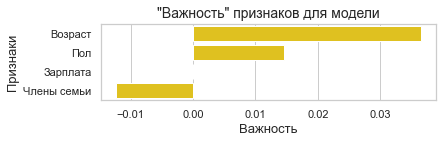

,features,coef
0,Возраст,0.0365
1,Пол,0.0146
2,Зарплата,0.0000
3,Члены семьи,-0.0123


In [18]:
# исходные данные
func(LinearRegression(), X, y)

r2 = 0.4231


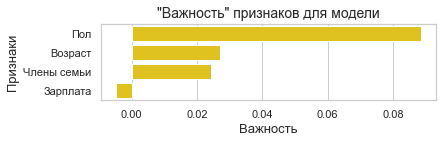

,features,coef
0,Пол,0.0884
1,Возраст,0.0270
2,Члены семьи,0.0243
3,Зарплата,-0.0048


In [19]:
# преобразованные данные
func(LinearRegression(), Z, y)

Видим, что значение метрики `r2` не изменилось

## Вывод:

Для защиты данных клиентов страховой компании был предложен алгоритм шифрования данных, основанный на умножении матрицы признаков на случайную обратимую матрицу. Предложенный алгоритм был обоснован теоретически. Было обнаружено, что алгоритм не ухудшает предсказания модели, но позволяет эффективно шифровать данные клиентов.

На примере модели линейной регрессии показали, что качество модели с шифрованием не отличается от качества модели без шифрования признаков. Данный метод шифрования можно использовать для защиты данных клиентов.